In [1]:
import pandas as pd    
import numpy as np 
import matplotlib.pyplot as plt 

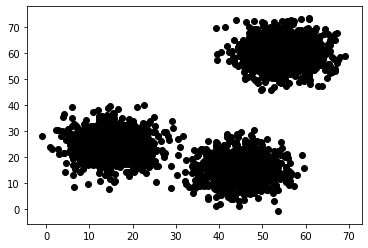

In [2]:
# Dataset

x1 = np.random.normal(15,5,1000)
y1 = np.random.normal(25,5,1000)

x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

x3 = np.random.normal(45,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)

d = {'x':x,'y':y}

df = pd.DataFrame(d,columns=['x','y'])

plt.scatter(x1,y1,c='black')
plt.scatter(x2,y2,c='black')
plt.scatter(x3,y3,c='black')
plt.show()

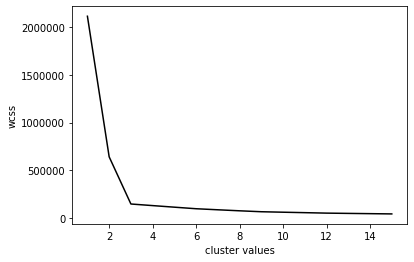

In [3]:
# KMeans

from sklearn.cluster import KMeans

wcss_results = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss_results.append(kmeans.inertia_)

plt.plot(range(1,16),wcss_results,color='black')
plt.xlabel('cluster values')
plt.ylabel('wcss')
plt.show()

In [4]:
# clustering for k = 3
kmeans_k3 = KMeans(n_clusters=3,random_state=12,init='k-means++')
clusters = kmeans_k3.fit_predict(df)
df['label'] = clusters
df.tail()

,x,y,label
2995,40.967530,14.711133,0
2996,45.799927,13.077497,0
2997,43.164840,8.965127,0
2998,51.213277,18.443557,0
2999,43.786693,17.178272,0


In [5]:
center_x = kmeans_k3.cluster_centers_[:,0]
center_y = kmeans_k3.cluster_centers_[:,1]

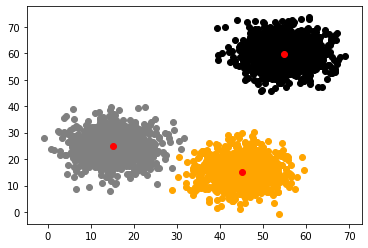

In [6]:
plt.scatter(df.x[df.label==0],df.y[df.label==0],color='orange')
plt.scatter(df.x[df.label==1],df.y[df.label==1],color='black')
plt.scatter(df.x[df.label==2],df.y[df.label==2],color='grey')
plt.scatter(center_x,center_y,color='red')
plt.show()

In [7]:
kmeans_k3.cluster_centers_

array([[45.0195475 , 15.10880462],
       [54.86176446, 59.88287285],
       [15.17056932, 24.8837146 ]])